In [1]:
import sys
sys.path.append("../../")

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from ml.model.metrics import Metrics
from ml.visualization.visualization import Visualization

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Dataset - NFL

This dataset is comprised of statistics on all eligible receivers from the 2018 NFL regular season.

https://www.scikit-yb.org/en/latest/api/datasets/nfl.html

In [30]:
X, y = load_nfl()

In [31]:
X.nunique()

Age           20
G             16
GS            17
Tgt          117
Rec           86
Ctch_Rate    203
Yds          319
Y/R          164
TD            15
Lng           89
Y/Tgt        127
R/G           65
Y/G          305
Fmb           11
C_pos          2
CB_pos         2
DT_pos         2
FB_pos         2
QB_pos         2
RB_pos         2
T_pos          2
TE_pos         2
WR_pos         2
dtype: int64

In [32]:
cols = X.columns

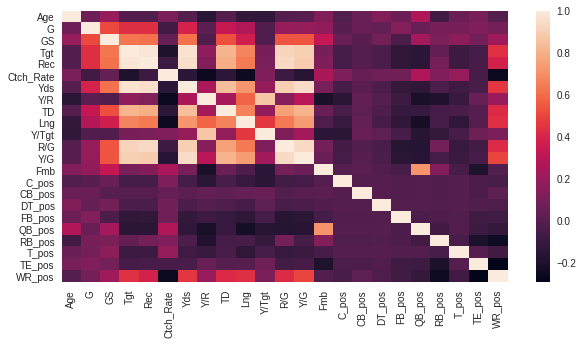

In [33]:
fig, ax = plt.subplots(figsize=(10,5))  
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

# Model

## Melhor k

In [131]:
KElbowVisualizer?

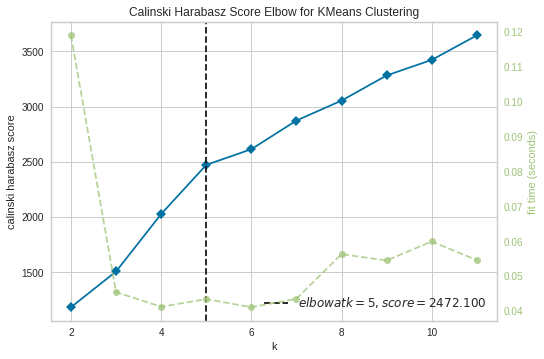

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric="calinski_harabasz")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

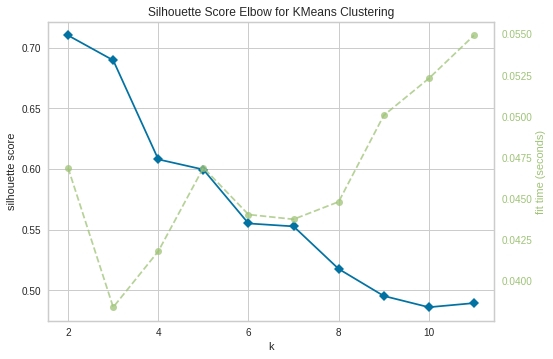

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric="silhouette")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

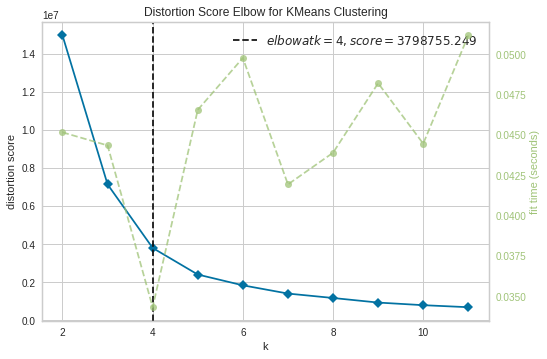

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

k= 2
{'silhouette': 0.7104997938864888, 'calinski_harabaz': 1186.249570775198}
____
k= 3
{'silhouette': 0.6900802853783395, 'calinski_harabaz': 1511.2475642716743}
____
k= 4
{'silhouette': 0.6092732437453018, 'calinski_harabaz': 2033.892537829683}
____
k= 5
{'silhouette': 0.6001669174540226, 'calinski_harabaz': 2480.9577448800414}
____
k= 6
{'silhouette': 0.5556267773628513, 'calinski_harabaz': 2624.097685262858}
____
k= 7
{'silhouette': 0.5517569877189025, 'calinski_harabaz': 2875.716653135983}
____
k= 8
{'silhouette': 0.5159597829407497, 'calinski_harabaz': 3064.1106192198586}
____
k= 9
{'silhouette': 0.49606571573369274, 'calinski_harabaz': 3283.4193439556907}
____
k= 10
{'silhouette': 0.49499564455517886, 'calinski_harabaz': 3411.7572274124927}
____


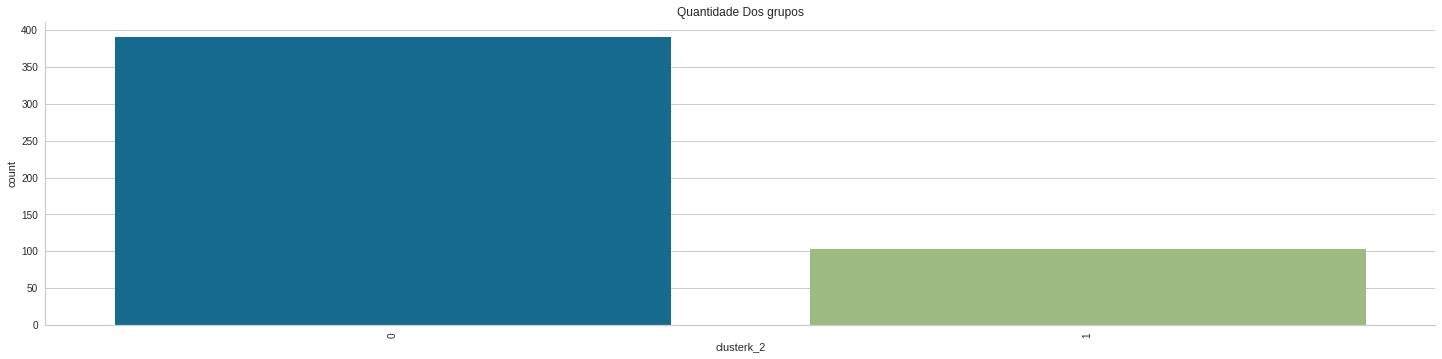

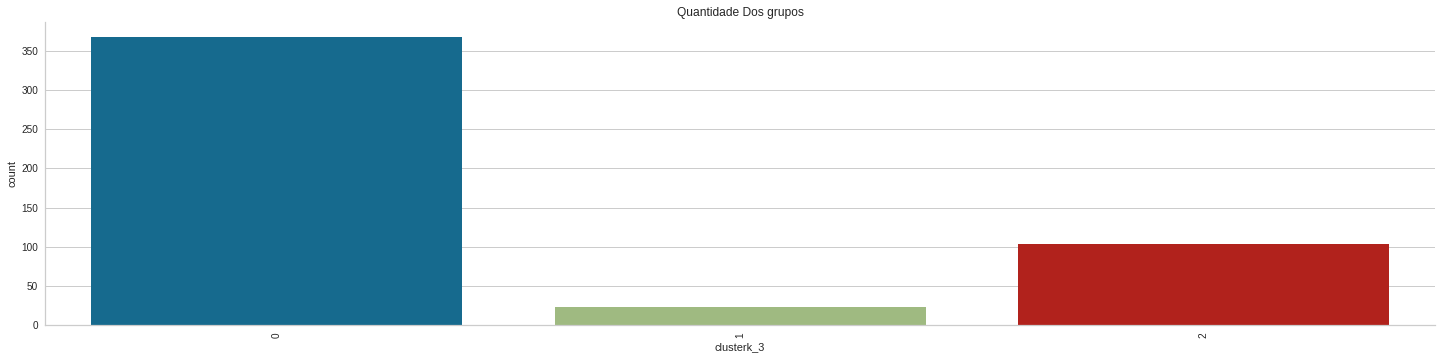

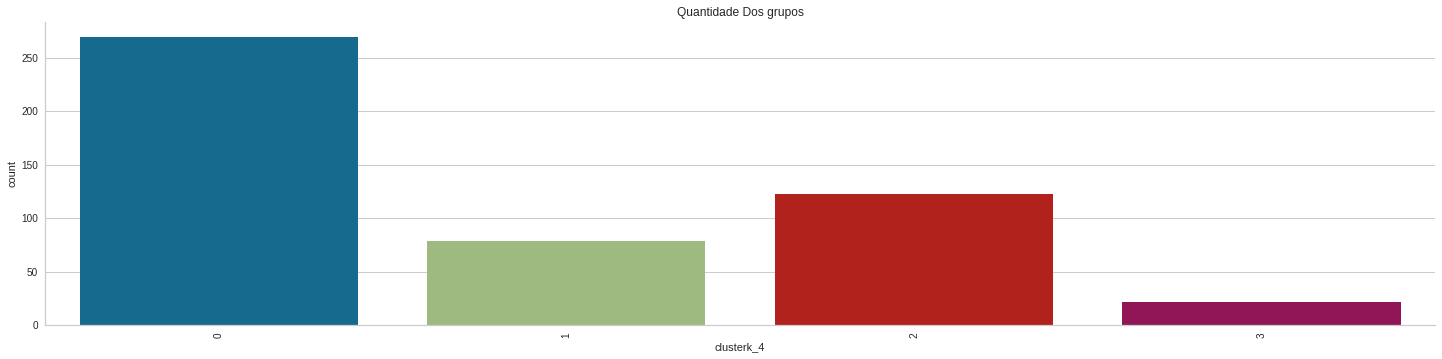

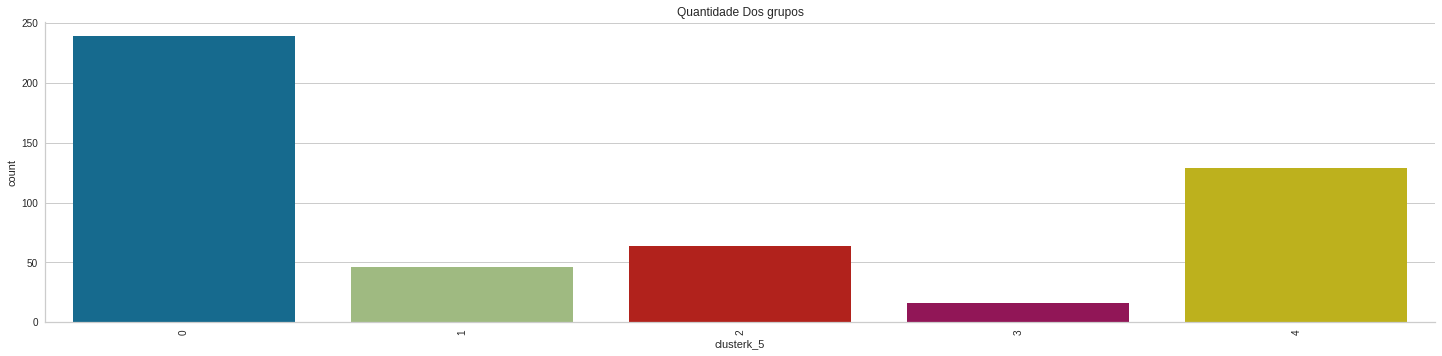

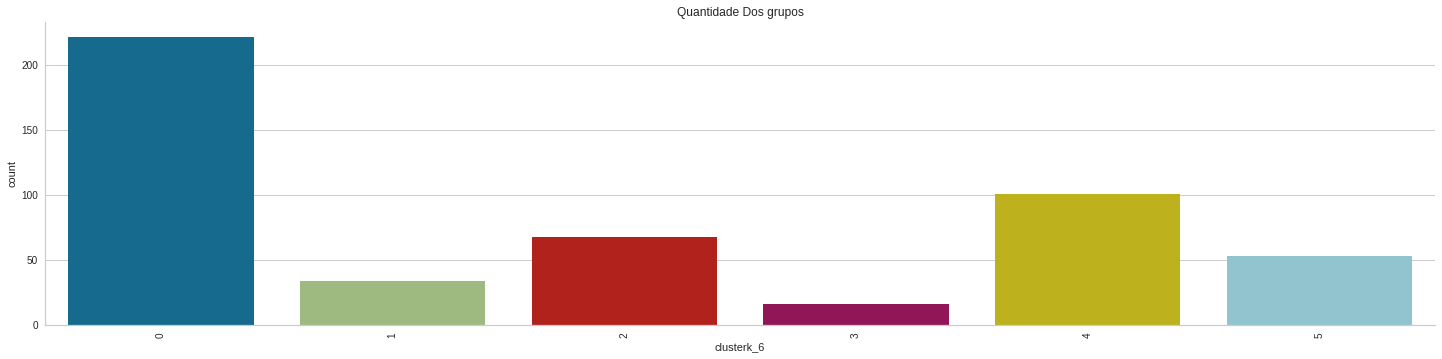

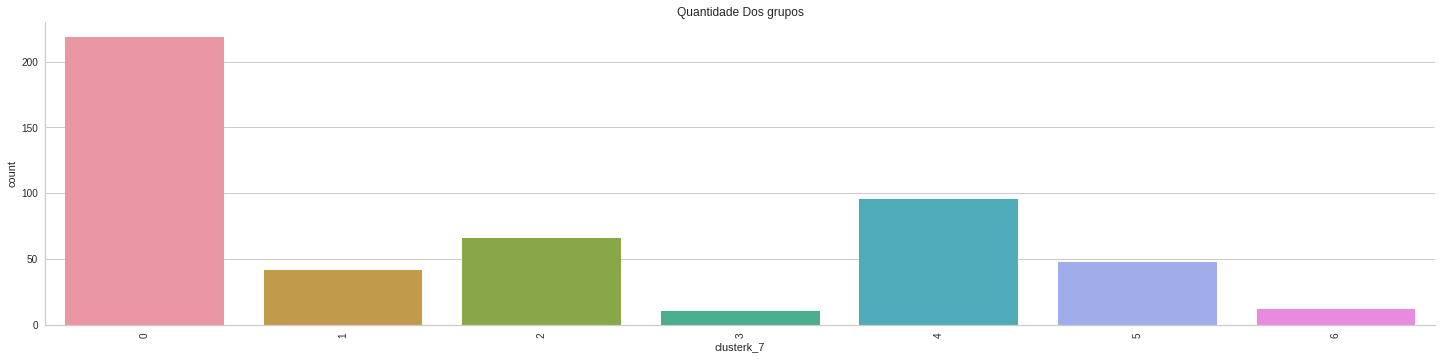

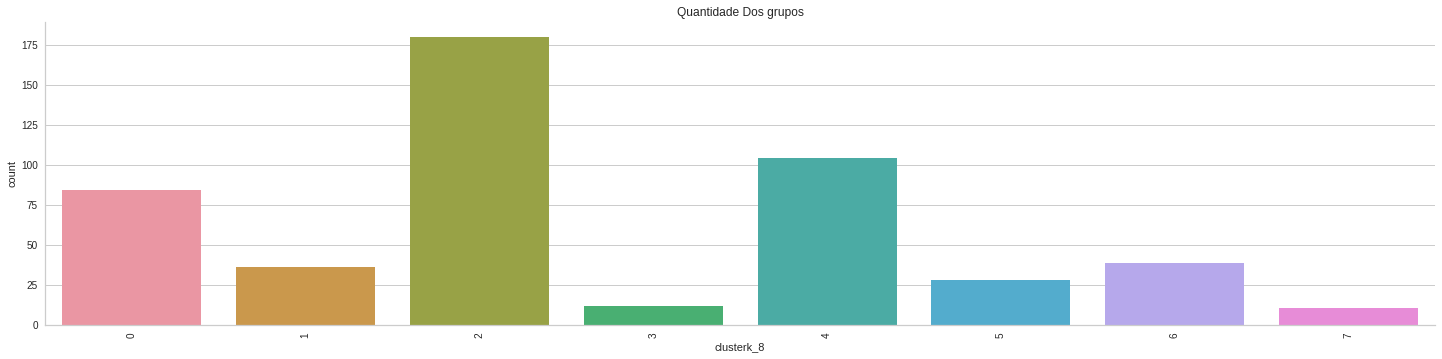

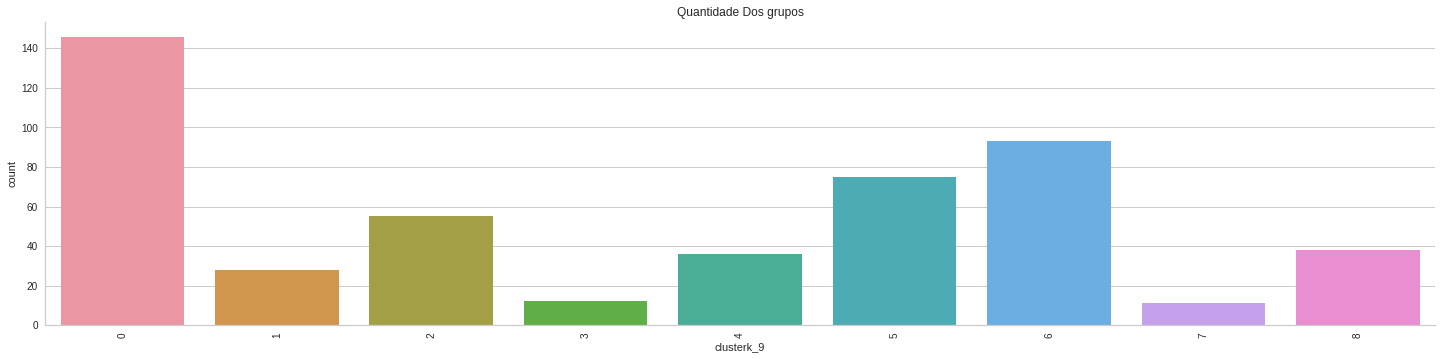

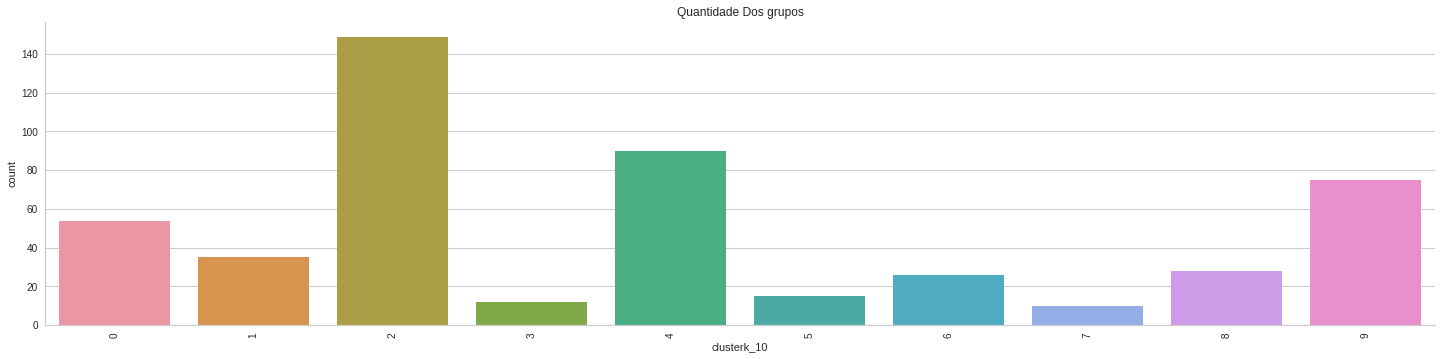

In [35]:
for k in range(2,11):
    model = KMeans(k, random_state=42)
    model.fit(X[cols])
    col = "clusterk_"+str(k) 
    X[col] = model.labels_
    Visualization.count_values(X, col, "Quantidade Dos grupos")
    print("k=",k)
    print(Metrics.clusterization(X, model.labels_))
    print("____")

# Visualizações para avaliar

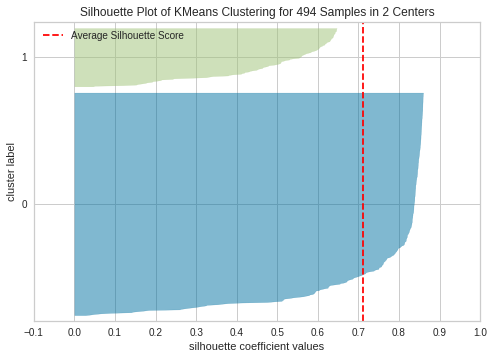

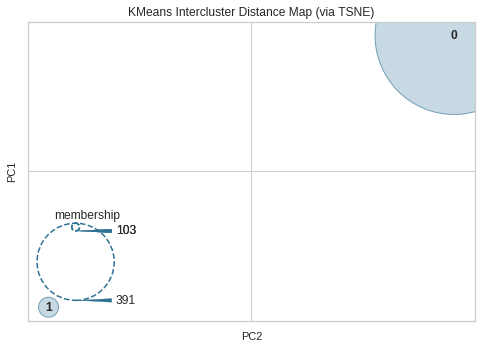

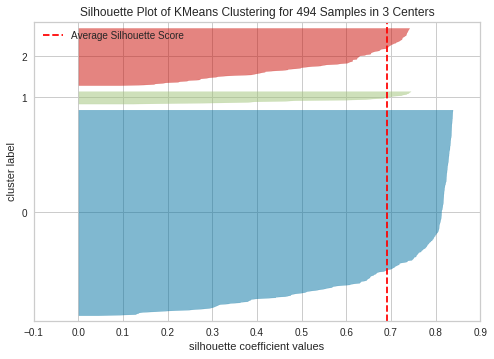

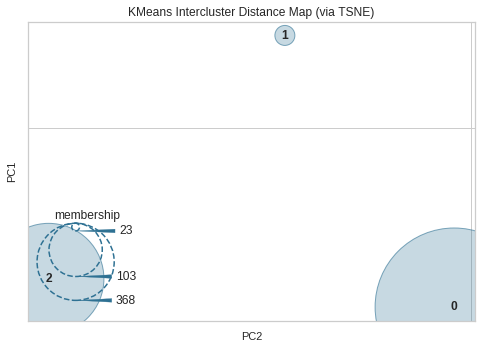

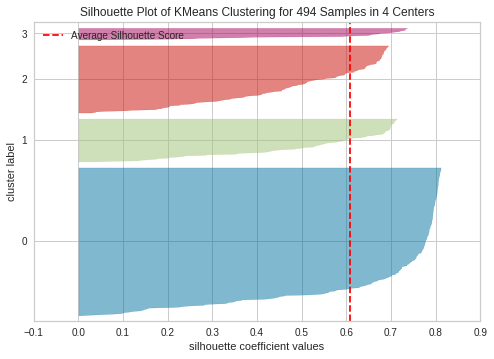

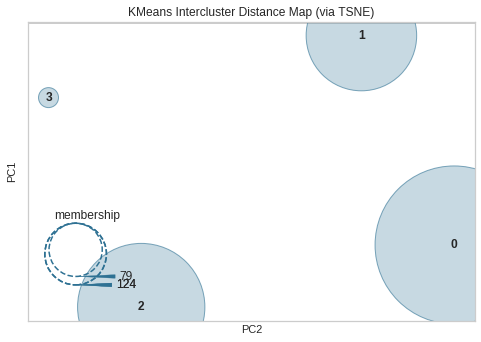

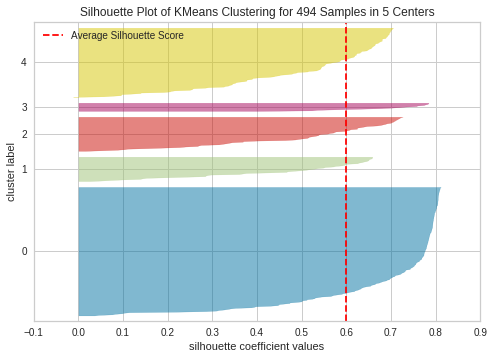

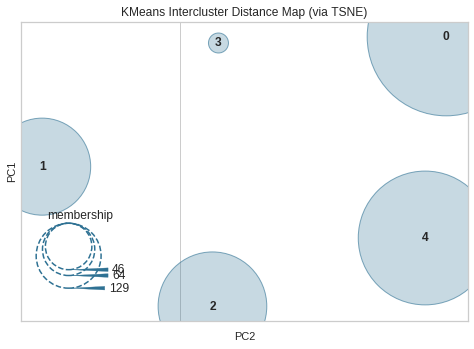

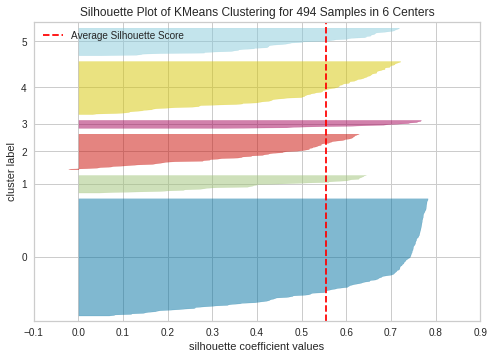

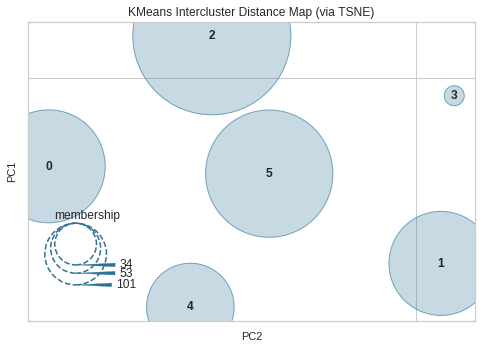

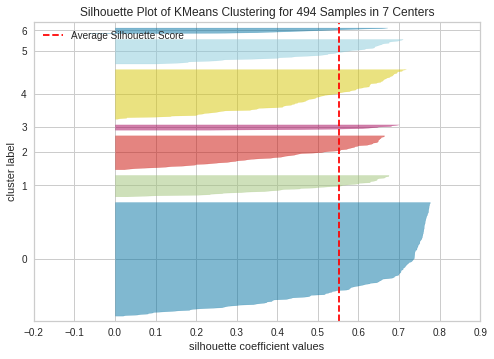

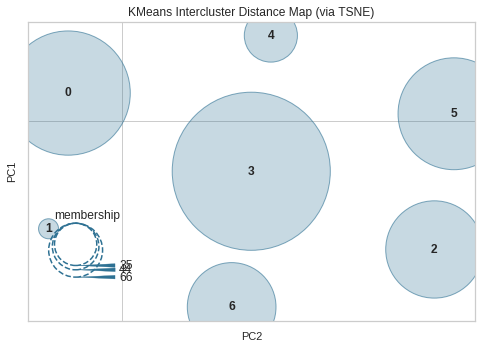

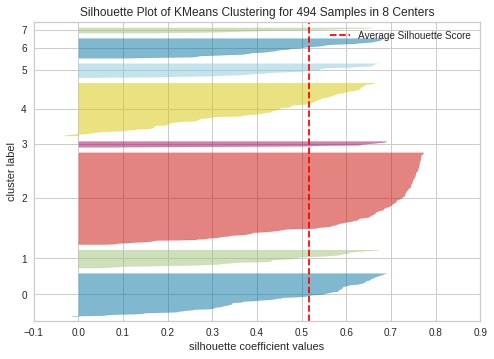

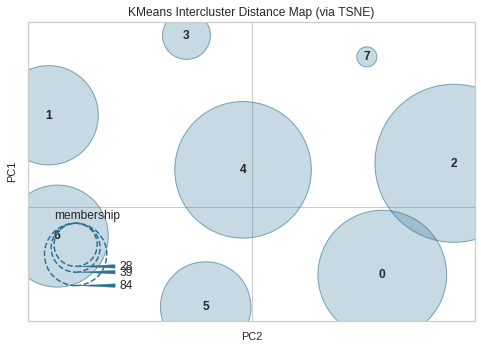

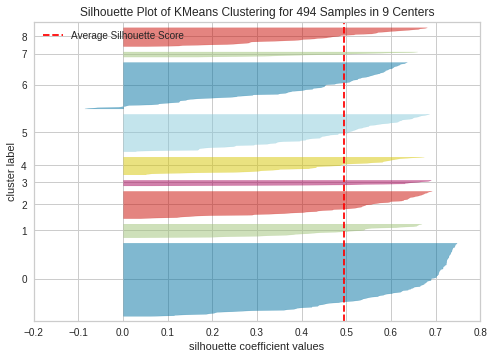

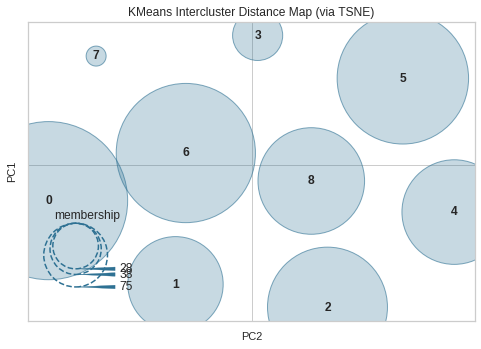

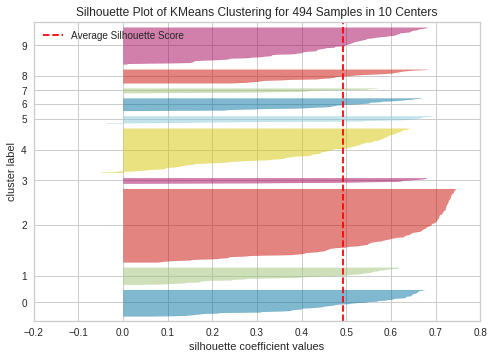

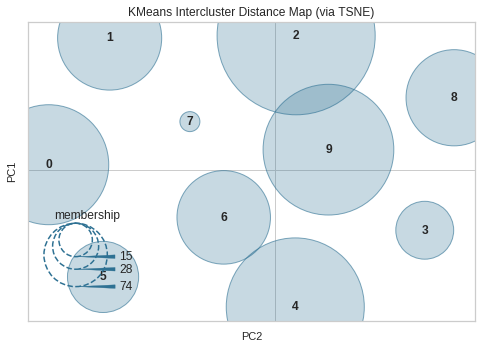

In [42]:
for k in range(2,11):
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', random_state=42)
    visualizer.fit(X[cols])
    visualizer.show()    
    
    model = KMeans(k, random_state=42)
    visualizer = InterclusterDistance(model, embedding="tsne", random_state=42)
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

# Plot Cluster 2D

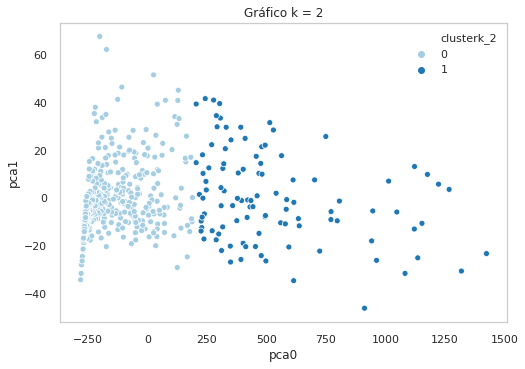

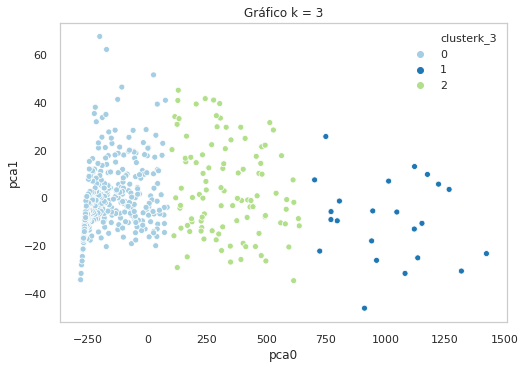

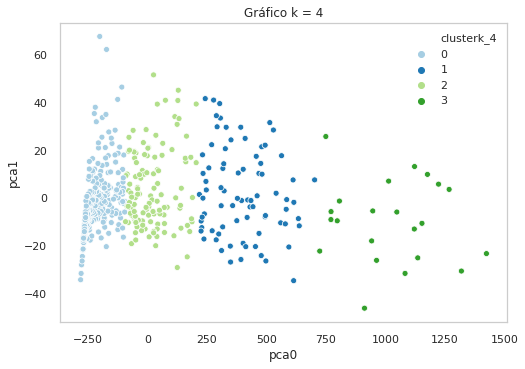

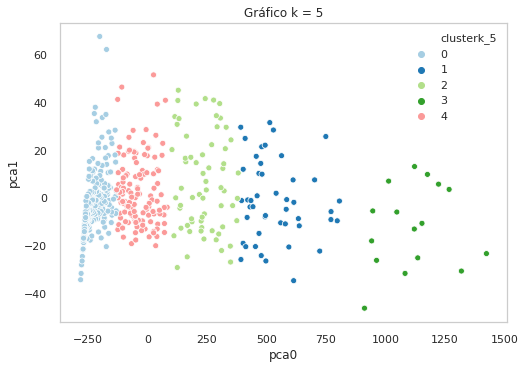

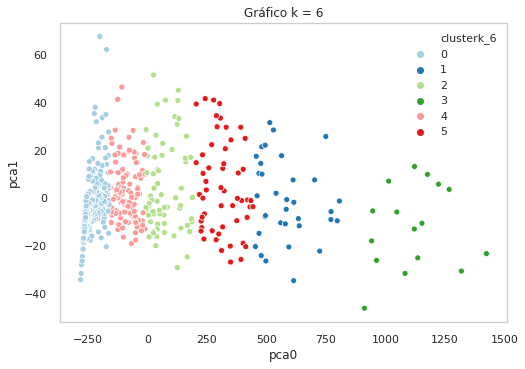

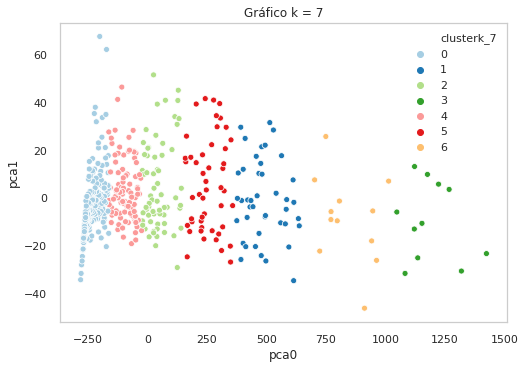

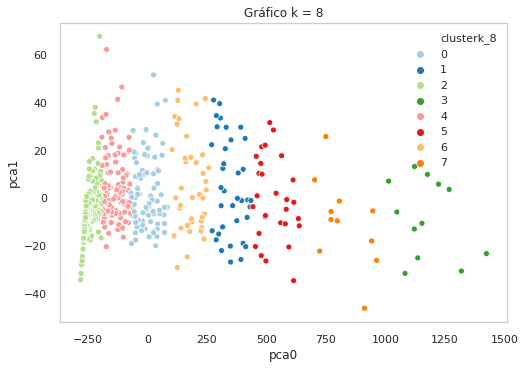

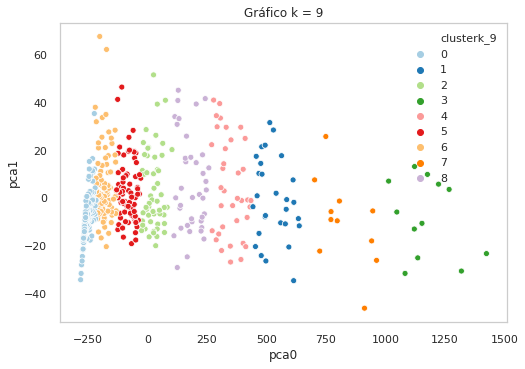

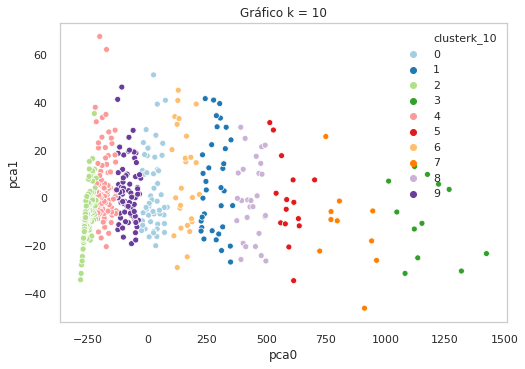

In [130]:
for k in range(2,11):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X[cols])
    df_pca = pd.DataFrame(X_pca)
    df_pca["clusterk_"+str(k)] = X["clusterk_"+str(k)]
    df_pca = df_pca.rename(columns={0:"pca0",1:"pca1"})
    palette=sns.color_palette('Paired', n_colors=k) 
    sns.scatterplot(df_pca["pca0"], df_pca["pca1"], hue=df_pca["clusterk_"+str(k)],legend="full",palette=palette)
    plt.title("Gráfico k = "+ str(k))
    plt.grid(False)
    plt.show()